In [22]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

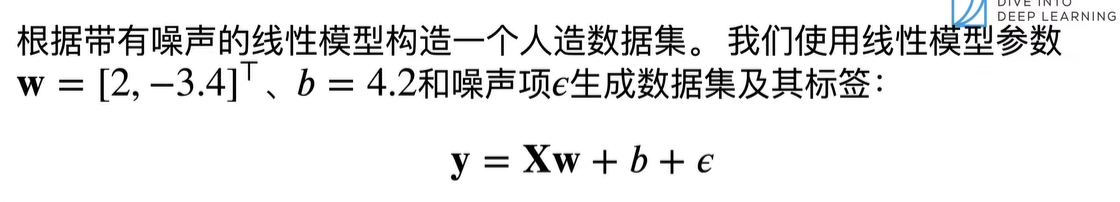

- torch.matmul是tensor的乘法,输入可以是高维的,当输入都是二维时,就是普通矩阵的乘法,和tensor.mm函数用法相同
  
  [matmul用法详解](https://blog.csdn.net/qsmx666/article/details/105783610)
  
  
- numpy.arange(n).reshape(-1,b)的用法: -1代表一个占位符,代替行数a的值,a的值自动计算a=n/b

In [23]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1,1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print("features:",features[0], "labels:",labels[0])

features: tensor([-0.2423,  1.6606]) labels: tensor([-1.9401])


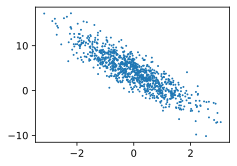

In [36]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(),1);

- 定义一个data_iter函数,该函数接收批量大小,特征矩阵和标签向量作为输入,生成大小为batch_size的小批量

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break

tensor([[-0.5802, -0.5469],
        [ 0.8527, -0.8179],
        [-1.0794,  0.3172],
        [-1.3177, -2.0090],
        [ 0.3235,  0.4584],
        [-2.5722,  1.5958],
        [-0.8066, -1.3415],
        [-0.7925,  1.3051],
        [-2.0830, -0.0624],
        [-0.1051, -2.2015]]) 
 tensor([[ 4.9159],
        [ 8.6744],
        [ 0.9847],
        [ 8.3971],
        [ 3.2861],
        [-6.3767],
        [ 7.1633],
        [-1.8312],
        [ 0.2504],
        [11.4688]])


- 定义初始化模型参数

In [26]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

###### 定义模型

In [27]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

###### 定义损失函数

In [28]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 /2

###### 定义优化函数

In [29]:
#随机梯度下降 Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr *  param.grad / batch_size
            param.grad.zero_()

In [30]:
lr = 0.03
#轮数
num_epochs = 3
#方便更换,所以都起了一个名字
net = linreg
loss = squared_loss
 
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)#x和y的小批量损失
        l.sum().backward()
        sgd([w, b], lr,  batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch{epoch + 1}, loss {float(train_l.mean()):f}")

epoch1, loss 0.029265
epoch2, loss 0.000108
epoch3, loss 0.000053


In [31]:
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([0.0009, 0.0004], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0005], grad_fn=<RsubBackward1>)


# 线性回归的简洁实现
### 通过使用深度学习框架来简洁地实现线性回归模型 生成数据集

In [15]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
features,labels

(tensor([[-0.0956,  1.0289],
         [-0.1238, -1.2409],
         [ 0.5418,  0.2455],
         ...,
         [ 0.3886,  0.5940],
         [ 0.9334, -0.2630],
         [ 1.7857,  0.5765]]),
 tensor([[ 5.1895e-01],
         [ 8.1893e+00],
         [ 4.4478e+00],
         [-2.1234e-01],
         [ 4.8746e+00],
         [ 7.4861e+00],
         [-9.3615e-02],
         [ 8.8176e-01],
         [ 4.2681e+00],
         [-1.4388e+00],
         [ 9.8585e+00],
         [ 9.5718e+00],
         [ 1.4540e+00],
         [ 1.9461e+00],
         [ 3.2413e+00],
         [ 3.5609e+00],
         [ 6.8344e+00],
         [ 4.8575e-03],
         [ 6.3262e+00],
         [ 1.8593e+00],
         [ 1.3394e+01],
         [ 8.1493e+00],
         [ 1.2035e+01],
         [-4.3137e+00],
         [ 1.7073e+00],
         [ 8.2363e+00],
         [ 1.9460e+00],
         [ 8.1259e+00],
         [-4.9491e+00],
         [ 2.2391e+00],
         [-2.2679e+00],
         [ 4.6952e-01],
         [ 8.9470e+00],
         [ 8.3492e

## 调用框架中现有的API来读取数据
**方法后加一个下划线代表代表要替换原数据,而不是返回新的对象**
  
  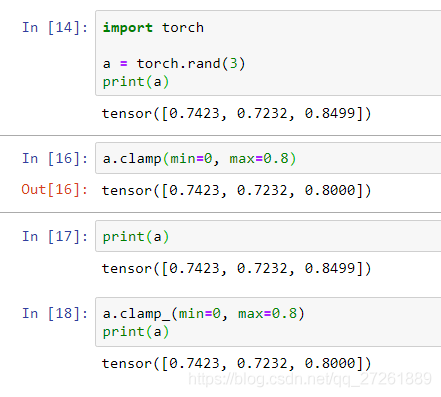

In [9]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 1.4857,  0.0173],
         [ 0.6394, -1.7342],
         [-0.7517,  0.6340],
         [ 0.4333, -1.1074],
         [ 0.1978, -0.0094],
         [ 0.3379, -2.2473],
         [-0.6798, -0.6152],
         [-0.6012,  0.4674],
         [ 0.7664, -0.7776],
         [ 1.0835,  1.1207]]),
 tensor([[ 7.1003],
         [11.3656],
         [ 0.5636],
         [ 8.8397],
         [ 4.6136],
         [12.5283],
         [ 4.9319],
         [ 1.4080],
         [ 8.3781],
         [ 2.5748]])]

In [10]:
from torch import nn
#创建一个全连接层,输入是2,输出是1,因为线性回归就是一个简单的单层神经网络
# Sequential->可以理解为list of layers
net = nn.Sequential(nn.Linear(2,1))

In [17]:
#第一层的权重的数值,按照正态分布进行替换(_)
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

- 均方误差使用的是MSELoss类,也称为平方L2范数

In [18]:
loss = nn.MSELoss()

- 实例化SGD实例

In [19]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

In [21]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f"epoch{epoch+1}, loss{l:f}")

epoch1, loss0.000278
epoch2, loss0.000100
epoch3, loss0.000101
